In [7]:
import pyrothermel
import pandas as pd
import seaborn as sns

from example import canopy_base_height, canopy_bulk_density

## Setup Base Fuel Model and Moisture Scenario

In [13]:
moisture = pyrothermel.MoistureScenario.from_existing(dead_fuel_moisture_class='low',live_fuel_moisture_class='moderate')
fuel = pyrothermel.FuelModel.from_existing(identifier='TL8')
canopy_base_height = 2.5 # default unit is m
canopy_bulk_density = .1 # default unit is kg/m^3

# Print some fuel loading values from fuel model TL8
print([fuel.fuel_load_one_hour, fuel.fuel_load_ten_hour, fuel.fuel_load_hundred_hour])
print(fuel.units.loading_units)


[1.300187341185569, 0.31383832373444764, 0.2465872543627803]
LoadingUnitsEnum.KilogramsPerSquareMeter


## Run Rothermel Models Across Range of Wind Speeds

In [9]:
results_list = []
for wind_speed in range(0,60):
    run = pyrothermel.PyrothermelRun(fuel,moisture,wind_speed,wind_input_mode='ten_meter',canopy_base_height=canopy_base_height,canopy_bulk_density=canopy_bulk_density,canopy_cover=.5,canopy_height=20,canopy_ratio=.6)
    results_surface = run.run_surface_fire_in_direction_of_max_spread()
    results_final = run.run_crown_fire_scott_and_reinhardt()
    results_final['wind_speed'] = wind_speed
    results_final['treatment'] = 'untreated'
    results_list.append(results_final)
    
untreated_crowning_index = run.calculate_crowning_index()
untreated_torching_index = run.calculate_torching_index()
    
df = pd.DataFrame(results_list)
df


,spread_rate,flame_length,fireline_intensity,scorch_height,transition_ratio,active_ratio,fire_type,wind_speed,treatment
0,0.035297,0.850504,182.940784,5.005403,0.274758,0.025974,Surface,0,untreated
1,0.035734,0.855332,185.205905,5.059386,0.278160,0.028804,Surface,1,untreated
2,0.036477,0.863471,189.058483,5.150455,0.283946,0.033603,Surface,2,untreated
3,0.037407,0.873532,193.880284,5.263140,0.291188,0.039601,Surface,3,untreated
4,0.038485,0.885015,199.463628,5.391881,0.299574,0.046541,Surface,4,untreated
5,0.039686,0.897621,205.691534,5.533368,0.308928,0.054277,Surface,5,untreated
6,0.040997,0.911142,212.486479,5.685303,0.319133,0.062713,Surface,6,untreated
7,0.042407,0.925421,219.792338,5.845960,0.330106,0.071779,Surface,7,untreated
8,0.043907,0.940336,227.566123,6.013981,0.341781,0.081423,Surface,8,untreated
9,0.045490,0.955787,235.773581,6.188266,0.354108,0.091601,Surface,9,untreated


## Modify Fuel Loading and Recalculate

In [10]:
fuel.fuel_load_one_hour *= .5
fuel.fuel_load_ten_hour *= .5
fuel.fuel_load_hundred_hour *= .75
fuel.fuel_bed_depth *= .5

results_list = []
for wind_speed in range(0,60):
    run = pyrothermel.PyrothermelRun(fuel,moisture,wind_speed,wind_input_mode='ten_meter',canopy_base_height=2.5,canopy_bulk_density=.1,canopy_cover=.5,canopy_height=20,canopy_ratio=.6)
    results_surface = run.run_surface_fire_in_direction_of_max_spread()
    results_final = run.run_crown_fire_scott_and_reinhardt()
    results_final['wind_speed'] = wind_speed
    results_final['treatment'] = 'treated'
    results_list.append(results_final)

treated_crowning_index = run.calculate_crowning_index()
treated_torching_index = run.calculate_torching_index()

df_treated = pd.DataFrame(results_list)
df = pd.concat([df,df_treated])

## Display Results

[Text(0.5, 0, 'Wind Speed (km/hr)'), Text(0, 0.5, 'Flame Length (m)')]

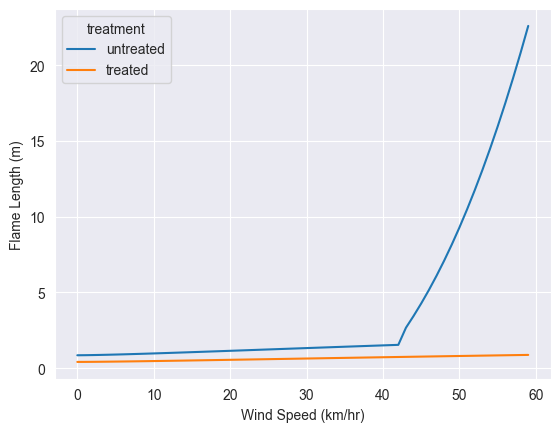

In [14]:
sns.lineplot(df,x='wind_speed',y='flame_length',hue='treatment').set(xlabel='Wind Speed (km/hr)',ylabel='Flame Length (m)')

In [15]:
print('Wind Speed to initiate crown fire in untreated stand: ', untreated_torching_index, ' km/hr')
print('Wind Speed to initiate crown fire in treated stand: ', treated_torching_index, ' km/hr')
print('Wind Speed to propagate crown fire in untreated stand: ', untreated_crowning_index, ' km/hr')
print('Wind Speed to propagate crown fire in treated stand: ', treated_crowning_index, ' km/hr')

Wind Speed to initiate crown fire in untreated stand:  43  km/hr
Wind Speed to initiate crown fire in treated stand:  98  km/hr
Wind Speed to propagate crown fire in untreated stand:  60  km/hr
Wind Speed to propagate crown fire in treated stand:  60  km/hr
